In [17]:
using Plots
using JLD2 
using LatticeAlgorithms
using BlockDiagonals

# Fig 2a

## Load the data for optimized codes

In [2]:
Nrange = 2:10
optimized_distances = []
for N in Nrange
    push!(optimized_distances, load("data/optimized_codes/distance_opt_$(N)_1000.jld2")["optimized_distance"])
end

## Load the data for the repetition codes

In [3]:
distances_rep_rec = load("data/repetition_codes/distances_rep_rec.jld2");
distances_YY_rep_rec = load("data/repetition_codes/distances_YY_rep_rec.jld2");

## Get the distances of other example codes
5 modes: [5,1,3] with hex

7 modes: [7,1,3] with hex

9 modes: surface with hex

10 modes: [5,1,3] with D4

In [4]:
S_hex_T = [2 0; 
    1 sqrt(3)] / (12)^(1/4);

In [5]:
## 5 modes: [5,1,3] with hex

M_513 = [
    1 0 0 1 0 1 1 0 0 0; 
    0 2 0 0 0 0 0 0 0 0; 
    0 0 1 0 0 1 0 1 1 0; 
    0 0 0 2 0 0 0 0 0 0;
    1 0 0 0 1 0 0 1 0 1; 
    0 0 0 0 0 2 0 0 0 0; 
    0 1 1 0 0 0 1 0 0 1; 
    0 0 0 0 0 0 0 2 0 0; 
    0 0 0 0 0 0 0 0 2 0; 
    0 0 0 0 0 0 0 0 0 2
]/√2 * BlockDiagonal([S_hex_T for _ in 1 : 5])
# det(M_513)
# distances(M_513)
distance_513 = min(distances(M_513)...)

3.298908332373798

In [6]:
## 7 modes: [7,1,3] with hex


M_713 = [
    1 0 0 0 1 0 0 0 1 0 0 0 1 0; # ZIZIZIZ
    0 1 0 0 0 1 0 0 0 1 0 0 0 1; # XIXIXIX    
    0 0 1 0 1 0 0 0 0 0 1 0 1 0; # IZZIIZZ    
    0 0 0 1 0 1 0 0 0 0 0 1 0 1; # IXXIIXX
    0 0 0 0 2 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 2 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 1 0 1 0 1 0 1 0; # IIIZZZZ    
    0 0 0 0 0 0 0 1 0 1 0 1 0 1; # IIIXXXX 
    0 0 0 0 0 0 0 0 2 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 2 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 2 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 2 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 2 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 2
]/√2 * BlockDiagonal([S_hex_T for _ in 1 : 7])
# det(M_713)
# distances(M_713)
distance_713 = min(distances(M_713)...)

3.298908332373796

In [7]:
## 9 modes: surface with hex

M_surf = surface_code_M(3) * BlockDiagonal([S_hex_T for _ in 1:9])
# det(M_surf)
# distances(M_surf)
distance_surf = min(distances(M_surf)...)


3.2989083323737938

In [8]:
## 10 modes: [5,1,3] with D4

S_D4_T = [1/sqrt(2) 0 0 0; 
    0 1/sqrt(2) 0 0; 
    0 0 1 0; 
    0 0 0 1] * [0 2 0 0; 
    -1 -1 1 1; 
    0 0 1 1; 
    0 1 -1 0];
M0 = [1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0;    # ZXXZI
    0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;      
    0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0;      # IZXXZ
    0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0 0 0 0; 
    1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0;      # ZIZXX
    0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0 0 0 0; 
    0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0;      # XZIZX
    0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2) 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 sqrt(2)] / sqrt(2);

M_513_D4 = M0 * BlockDiagonal([S_D4_T for _ in 1:5]);

distance_M_513_D4 = min(distances(M_513_D4)...)

4.341607527349578

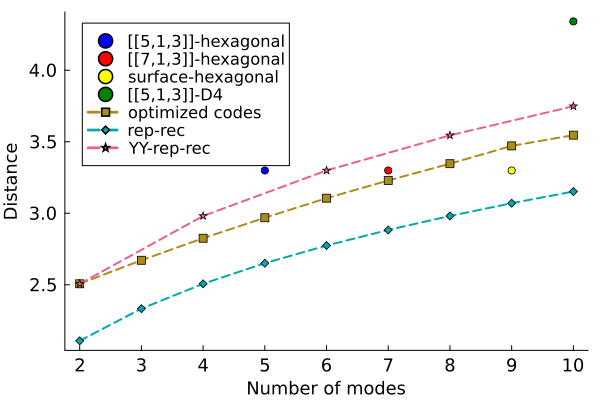

In [9]:
linewidth=2
plot()
scatter!([5], [distance_513], marker=:circle, markercolor=:blue, label="[[5,1,3]]-hexagonal")
scatter!([7], [distance_713], marker=:circle, markercolor=:red, label="[[7,1,3]]-hexagonal")
scatter!([9], [distance_surf], marker=:circle, markercolor=:yellow, label="surface-hexagonal")
scatter!([10], [distance_M_513_D4], marker=:circle, markercolor=:green, label="[[5,1,3]]-D4")
plot!(Nrange, -optimized_distances, marker=:square, label="optimized codes", linewidth=linewidth, linestyle=:dash)


plot!(distances_rep_rec["Nrange"][2:end], distances_rep_rec["dX_list"][2:end], marker=:diamond, label="rep-rec", linewidth=linewidth, linestyle=:dash)
plot!(2*distances_YY_rep_rec["Nrange"][1:5], distances_YY_rep_rec["dX_list"][1:5], marker=:star, label="YY-rep-rec", linewidth=linewidth, linestyle=:dash)

xlabel!("Number of modes")
ylabel!("Distance")
plot!(grid=false, 
    tickfontsize=12, 
    labelfontsize=12, 
    legendfontsize=11,
    legend=:topleft,
    xticks = 2:10
)


In [10]:
savefig("plots/comparison_optimized_distances_presentation.pdf");

# Fig 2b

In [11]:
num_samples = 1e6
σrange = range(0.4, 0.8, 50)
σind = 19 ;

## Load the data for optimized codes

In [12]:
data_optimized = load("data/optimized_codes/fidelity_optimized_codes_$σind.jld2")
fidelities_optimized = [val[1] for (_, val) in sort(data_optimized["fidelities"])]
Nrange_optimized = data_optimized["Nrange"]
σ_optimized = data_optimized["σrange"][1] ; 


## Load the data for example codes

In [13]:
data_examples = load("data/example_codes/fidelity_examples_$σind.jld2")
Nrange_examples = data_examples["Nrange"]
fidelities_examples = [0.0 for _ in 1 : length(Nrange_examples)]
for (key, val) in data_examples["fidelities"]
    N_ind = findall(x->x==key[2], Nrange_examples)[1]
    fidelities_examples[N_ind] = val[1]
end
σ_examples = data_examples["σrange"][1] ; 
@assert σ_examples ≈ σ_optimized

## Load the data for repetition codes

In [14]:
data_rep_rec = load("data/repetition_codes/fidelity_rep_rec.jld2")
σrange = data_rep_rec["σrange"]
p0list_rep_rec = data_rep_rec["p0list"]
fidelities_rep_rec = p0list_rep_rec[σind]
Nrange_rep_rec = data_rep_rec["Nrange"];

data_YY_rep_rec = load("data/repetition_codes/fidelity_YY_rep_rec.jld2")
σrange = data_YY_rep_rec["σrange"]
p0list_YY_rep_rec = data_YY_rep_rec["p0list"]
fidelities_YY_rep_rec = p0list_YY_rep_rec[σind]
Nrange_YY_rep_rec = data_YY_rep_rec["Nrange"];


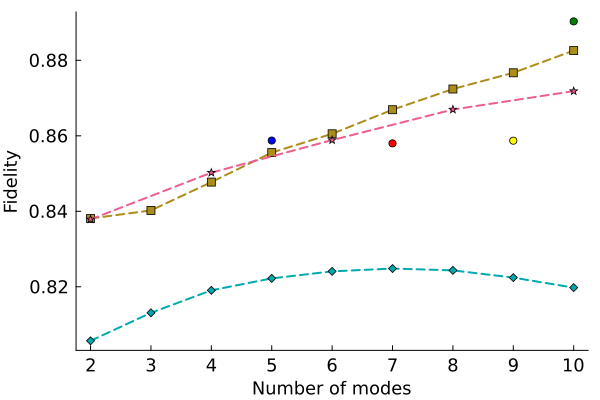

In [15]:
linewidth=2
plot()
scatter!([Nrange_examples[1]], [fidelities_examples[1]], marker=:circle, markercolor=:blue, label="[5,1,3]")
scatter!([Nrange_examples[2]], [fidelities_examples[2]], marker=:circle, markercolor=:red, label="[7,1,3]")
scatter!([Nrange_examples[3]], [fidelities_examples[3]], marker=:circle, markercolor=:yellow, label="surface code")
scatter!([Nrange_examples[4]], [fidelities_examples[4]], marker=:circle, markercolor=:green, label="[5,1,3] with D4")

plot!(Nrange_optimized, fidelities_optimized, marker=:square, label="optimized codes", linewidth=linewidth, linestyle=:dash)


plot!(Nrange_rep_rec[2:end], fidelities_rep_rec[2:end], marker=:diamond, label="tess2N", linewidth=linewidth, linestyle=:dash)
plot!(2Nrange_YY_rep_rec[1:5], fidelities_YY_rep_rec[1:5], marker=:star, label="tess4N", linewidth=linewidth, linestyle=:dash)

xlabel!("Number of modes")
ylabel!("Fidelity")
pt = plot!(grid=false, 
    tickfontsize=12, 
    labelfontsize=12, 
    legend=false,
    xticks = 2:10,
)


In [16]:
savefig("plots/comparison_optimized_fidelities.pdf") ; 